# Projet de Machine Learning

$Hugo DA COSTA, Alban GUERBOIS$

$Master1-Informatique-Décision-Données$

#### Consigne préalable : afin de réaliser au mieux nos imports des modules, veuillez écrire dans votre terminal : 
- ' pip install import-ipynb '

- ' pip install qpsolvers '

- ' pip install cvxpy '

## Introduction

Lien vers le Data-set : 
https://www.kaggle.com/deepu1109/star-dataset/data

Ayant toujours eu un intérêt pour le ciel, l’espace et ses secrets, notre recherche de sujet concernant ce projet se tourna très rapidement vers les planètes et les étoiles. Depuis le site Kaggle, nous avons alors cherché un Data-set adéquat, qui serait assez riche pour mener une étude interessante, afin d'affiner nos connaissances en machine learning.

Le Data-set que nous avons selectionné est un Data-set sur les étoiles, libre d’accès sur Kaggle donc, dont les données ont été fournies par les instances de ce domaine, et dont une certaine partie ont été complété par des astrophysiciens, grâce notamment à : 
1. Stefan-Boltzmann's law of Black body radiation (To find the luminosity of a star)
2. Wienn's Displacement law (for finding surface temperature of a star using wavelength)
3. Relationship with absolute magnitude
4. Radius of a star using parallax .

Notre objectif dans ce projet est de déterminer un classifieur statistique intelligent de ces étoiles. Nous allons dans un premier temps procéder au nettoyage et à la préparation des données. Puis nous nous intéresserons à l’application de nos 2 modules de classification réalisés par nos soins, s’inspirant des méthodes de classification vues en classe ce Semestre
- Random Forest 
- SVM (et notre adaptation Multi-classes)

## 0. Imports nécessaires

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import import_ipynb
from moduleDecisionTree_RandomForest import * 
from moduleSVM import * 

importing Jupyter notebook from moduleDecisionTree_RandomForest.ipynb
importing Jupyter notebook from moduleSVM.ipynb


## 1. Cleaning et préparation du DataSet

In [3]:
df = pd.read_csv('star_dataset.csv')

In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [5]:
# Definition de notre data_set et de notre colonne etiquette.
target = df['Star type']
data = df.loc[:, df.columns != 'Star type']

On remarque que certaines colonnes ont des attributs sous forme de string. Ce qui n'est pas arrangeant dans notre volonté de classifier des vecteurs de $R^d$

On choisit donc de faire une échelle de valeurs, pour qu'à chaque couleur (string) soit assignée un nombre. Les valeurs assignées sont autant proches que le sont les couleurs entre elles. Ce nombre sera, par la suite, normalisé.

In [6]:
# Assignation de valeur de R aux attributs de type str

for line in data.index :
    if data.loc[line, 'Star color']=='Red' :
        data.loc[line, 'Star color'] = 2
        
    elif data.loc[line, 'Star color']=='Orange-red' or data.loc[line, 'Star color']=='Orange-Red' :
        data.loc[line, 'Star color'] = 2.5
    
    elif data.loc[line, 'Star color']=='Orange' :
        data.loc[line, 'Star color'] = 3
    
    elif data.loc[line, 'Star color']=='Pale yellow orange':
        data.loc[line, 'Star color'] = 4

    elif data.loc[line, 'Star color']=='Yellowish' or data.loc[line, 'Star color']=='Yellowish White ' or data.loc[line, 'Star color']=='Yellowish White' or data.loc[line, 'Star color']=='yellowish' or data.loc[line, 'Star color']=='yellowish-white' or data.loc[line, 'Star color']=='White-Yellow' or data.loc[line, 'Star color']=='yellow-white':
        data.loc[line, 'Star color'] = 4.5
    
    elif data.loc[line, 'Star color']=='White ' or data.loc[line, 'Star color']=='white' or data.loc[line, 'Star color']=='Whitish' or data.loc[line, 'Star color']=='White' :
        data.loc[line, 'Star color'] = 5
        
    elif data.loc[line, 'Star color']=='Blue White' or data.loc[line, 'Star color']=='Blue white' or data.loc[line, 'Star color']=='Blue white ' or data.loc[line, 'Star color']=='Blue-white' or data.loc[line, 'Star color']=='Blue-White':
        data.loc[line, 'Star color'] = 5.5
    
    elif data.loc[line, 'Star color']=='Blue ' or data.loc[line, 'Star color']=='Blue' :
        data.loc[line, 'Star color'] = 6

C:\Users\Alban\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Idem dans le cadre de la Classe Spectracle des vecteurs ! On procède de manière identique, en assignant des valeurs (normaisées par la suite) autant proches que le sont les classes spectrales.

In [7]:
for line in data.index :
    if data.loc[line, 'Spectral Class']=='M' :
        data.loc[line, 'Spectral Class'] = 2
    
    elif data.loc[line, 'Spectral Class']=='K' :
        data.loc[line, 'Spectral Class'] = 3
    
    elif data.loc[line, 'Spectral Class']=='G' :
        data.loc[line, 'Spectral Class'] = 4
    
    elif data.loc[line, 'Spectral Class']=='F' :
        data.loc[line, 'Spectral Class'] = 5
    
    elif data.loc[line, 'Spectral Class']=='A' :
        data.loc[line, 'Spectral Class'] = 6
    
    elif data.loc[line, 'Spectral Class']=='B' :
        data.loc[line, 'Spectral Class'] = 7
    
    elif data.loc[line, 'Spectral Class']=='O' :
        data.loc[line, 'Spectral Class'] = 8

C:\Users\Alban\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,2,2
1,3042,0.000500,0.1542,16.60,2,2
2,2600,0.000300,0.1020,18.70,2,2
3,2800,0.000200,0.1600,16.65,2,2
4,1939,0.000138,0.1030,20.06,2,2


## 2. Analyse à priori du Data-Set, et split de ce dernier

Notre Data-Set est globalement assez "net", c'est à dire que chaque valeur target pour $Star Type$ a des intervalles de valeurs pour chacun des attributs qu'il est facile de dégager. 

### 2.1 Statistiques du Data-Set

In [9]:
for d in data.columns :
    print("Attribut ", d, " -- (moyenne, variance) =", "(",data[d].mean(), " ; ", data[d].std(), ")", "\n ----------------- \n")

Attribut  Temperature (K)  -- (moyenne, variance) = ( 10497.4625  ;  9552.42503716402 ) 
 ----------------- 

Attribut  Luminosity(L/Lo)  -- (moyenne, variance) = ( 107188.36163460833  ;  179432.2449402145 ) 
 ----------------- 

Attribut  Radius(R/Ro)  -- (moyenne, variance) = ( 237.15778137500004  ;  517.1557634028478 ) 
 ----------------- 

Attribut  Absolute magnitude(Mv)  -- (moyenne, variance) = ( 4.382395833333335  ;  10.53251235061617 ) 
 ----------------- 

Attribut  Star color  -- (moyenne, variance) = ( 3.85625  ;  1.8057215261843458 ) 
 ----------------- 

Attribut  Spectral Class  -- (moyenne, variance) = ( 4.520833333333333  ;  2.5317199681660263 ) 
 ----------------- 



In [10]:
# Normalisation des données
data = ( data - data.mean() ) / (data.std() )

### 2.2 Apercu de nos possibles résultats (Benchmark par un simple DecisionTree)

In [11]:
# Separation en train_set et test_set
data_copy1 = data.copy()

X_train = data_copy1.sample(frac=0.7, random_state=None)
X_test = data_copy1.drop(X_train.index)

y_train, y_test = target[X_train.index], target[X_test.index]

In [12]:
X_train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
170,-0.725205,1.186028,2.403226,-1.135759,-1.02798,-0.9957
132,-0.774407,-0.597375,-0.457982,0.644443,-1.02798,-0.9957
169,-0.117715,1.768532,-0.412173,-0.984798,1.1872,1.37423
109,2.399761,1.364368,-0.329026,-0.965809,1.1872,1.37423
102,1.308834,0.110413,-0.388969,-0.962961,1.1872,1.37423


In [12]:
arbreTest = DecisionTree()
a = arbreTest.test_data(X_train, y_train, X_test, y_test)

print("Ci joint la Matrice de confusion produite par notre Decision Tree basique de test : \n ", a[1])

Ci joint la Matrice de confusion produite par notre Decision Tree basique de test : 
  [[13  0  0  0  0  0]
 [ 1 13  0  0  0  0]
 [ 0  0  8  0  0  0]
 [12  0  0  0  0  0]
 [12  0  0  0  0  0]
 [13  0  0  0  0  0]]


On observe que le Decision Tree donne des résultats cohérents OU incohérents selon les $Questions$ qu'ils se posent, avec une forte tendance à trouver la bonne classe pour l'étiquette 0 et l'étiquette 5, sûrement dû au fait que ces deux classes sont très différentes. Ce Data_set semble classifiable sans énorme difficulté, il suffit de trouver les bons hyperparamètres et les attributs percutants pour chacune des classes de $Star Type$.

Les classes 1, 2 et 3 semblent toutefois avoir de nombreuses valeurs en commun (notamment sur certains attributs), ce qui prouve que notre Decision Tree ne peut trouver immédiatement une classification correcte.

## 3. Classification par Support Vector Machine (SVM)

Le détail du code de notre méthode SVM est disponible au sein du fichier $moduleSVM.ipynb$ au sein du même dossier que celui ci.

### 3.1 Résultats attendus (pré-application)

Nous avons choisi le SVM multi-classes linéaire, car les données ont l'air aboslument séparables (il faudrait toutefois s'en assurer)  et la classification de type d'étoile étant une invention humaine, il existe en toute vraisemblance des règles sous jacentes à cette classification que le SVM peut réveler.

On s'attend à de bons résultats d'autant plus qu'il y peu d'outliers.
La base de données étant très petite, une approche théorique comme le SVM peut plus facilement reperer les "règles" sous jacentes de classification, très peu d'outliers viendront fausser cette classification (qui a elle même été créee pour éviter les ambiguités).

### 3.2 Application du SVM

In [21]:
# Separation en train_set et test_set
data_copy2 = data.copy()

X_train = data_copy2.sample(frac=0.7, random_state=None)
X_test = data_copy2.drop(X_train.index)

y_train, y_test = target[X_train.index], target[X_test.index]

In [14]:
X_train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
15,-0.749282,-0.597375,-0.458117,0.824837,-1.02798,-0.995700
220,1.379811,0.764086,-0.390903,-1.011382,1.1872,1.374230
5,-0.801625,-0.597375,-0.458368,1.196068,-1.02798,-0.995700
32,0.500243,-0.591044,-0.444659,-0.603123,0.910301,0.979242
35,-0.256004,-0.597327,-0.455100,-0.186318,0.633403,0.584254


In [24]:
MCSVM = MultClassSVMClassifier()
MCSVM.train(X_train, y_train)
y_pred = MCSVM.predict(X_test.values)
print("matrice de confusion produite par le SVM multi-classes")
print(confusion_matrix(y_test.values, y_pred))

matrice de confusion produite par le SVM multi-classes
[[16  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  1  0 11  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 15]]


### 3.4 Analyse des résultats post-application

On peut remarquer que le SVM multi-classes est très efficace dans notre cas.
Il arrive à classifier toutes les étoiles de la base de test correctement sauf une. Nous aurions pu tester d'autres stratégies de SVM multi-classes comme le "one versus rest".

## 4. Classification par Random Forest

Le détail du code de notre Random Forest (structure par les classes $Noeud$ - $DecisionTree$ - $RandomForest$), la classe $Question$ et les choix via la $GiniImpurity$, ...) est disponible au sein du fichier $moduleDecisionTreeRandomForest.ipynb$ au sein du même dossier que celui ci.

### 4.1 Résultats attendus (pré-application)

Nous avons choisis d'utiliser également la Random Forest comme seconde méthode de classification, car elle est généralement très efficace, et surtout, elle est très robuste au $Sur-apprentissage$.

Nos attentes sont assez hautes concernant la Random Forest. En effet, cette méthode de classification est relativement précise, commet peu d'erreurs et (comme dit précédemment) ne subit pas le surapprentissage.

De par la construction de notre structure d'Arbre (et de Forêt), nous pensons que nous allons obtenir dans un premier temps de bons résultats, et que suite à une $P-Fold-Validation$, nous allons obtenir de résultats de très bonnes qualités.

### 4.2 Application d'une Random Forest

In [14]:
# Separation en train_set et test_set
data_copy3 = data.copy()

X_train = data_copy3.sample(frac=0.7, random_state=None)
X_test = data_copy3.drop(X_train.index)

y_train, y_test = target[X_train.index], target[X_test.index]

In [15]:
X_train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
178,0.167762,0.071401,0.912186,-1.160444,0.910301,0.979242
26,-0.201777,-0.597375,-0.458562,0.932124,0.910301,0.584254
121,-0.729287,-0.597375,-0.458392,1.477103,-1.02798,-0.9957
128,-0.799950,-0.597375,-0.458430,1.441024,-1.02798,-0.9957
0,-0.777757,-0.597375,-0.458252,1.114416,-1.02798,-0.9957


#### WARNING : Cette partie est un peu longue à exécuter (de l'ordre de 2-3 minutes)

In [16]:
# On définit ici nos paramètres "par défaut", ceux qui nous donneront le premier résultat de cette classification.
n_trees = 10
max_d = 4

forest = RandomForest(nb_trees=n_trees, prop_individuals_byTree=0.1, prop_dimensions_byTree=0.3, max_depth_by_tree=max_d)   
pred, matrix = forest.test_data_rf(X_train, y_train, X_test, y_test)

print("Forest done !")
print("Confusion matrix of the forest : \n", matrix)

1 tree(s) done.
2 tree(s) done.
3 tree(s) done.
4 tree(s) done.
5 tree(s) done.
6 tree(s) done.
7 tree(s) done.
8 tree(s) done.
9 tree(s) done.
10 tree(s) done.
----------------


Forest done !
Confusion matrix of the forest : 
 [[11  0  0  0  0  0]
 [ 5 11  0  1  0  0]
 [ 0  0  7  1  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0 11  2  0]
 [ 0  0  0  0  2  7]]


### 4.3 Recherche des meilleurs hyperparamètres (méthode : p-fold validation)

In [17]:
# Split en j folders de notre Training_set

nombre_splits = 3
X_train = data_copy3.sample(frac=0.7, random_state=None)
X_test = data_copy3.drop(X_train.index)
y_train, y_test = target[X_train.index], target[X_test.index]

folders = np.array_split(X_train, nombre_splits)

#### WARNING : Cette partie est un peu longue à exécuter (de l'ordre de 20-30 minutes)

In [18]:
max_d = 3

var = []
min_value = 100000
best_couple = (0,0)

for n in range(7, 11):
    for propC in range(3, 6):
        propColumns = propC / 10
        
        resultats_all_folders_rf = []
        count = 1
        for f in folders :
            forest = RandomForest(nb_trees=n, prop_individuals_byTree=0.1, prop_dimensions_byTree=propColumns, max_depth_by_tree=max_d)   
            pred, matrix = forest.test_data_rf(f, y_train[f.index], X_test, y_test)
        
            print("Forest done : Folder n°",count, "; number of Trees : ", n , "; proportion of Columns by Tree : ", propColumns)
            print("Matrice de confusion : \n", matrix)
            resultats_all_folders_rf.append(pred)
            count += 1
            
        var.append( np.mean(np.std(resultats_all_folders_rf, axis=0)) )
        if var[len(var) - 1] <= min_value :
            min_value = var[len(var) - 1]
            best_couple = (n, propC)

print(best_couple)

1 tree(s) done.
2 tree(s) done.
3 tree(s) done.
4 tree(s) done.
5 tree(s) done.
6 tree(s) done.
7 tree(s) done.
----------------


Forest done : Folder n° 1 ; number of Trees :  7 ; proportion of Columns by Tree :  0.3
Matrice de confusion : 
 [[12  0  0  0  0  0]
 [10  0  0  0  0  0]
 [14  0  0  0  0  0]
 [ 1  0  0 10  0  0]
 [ 5  0  0  8  0  0]
 [ 0  0  0  0  0 12]]
1 tree(s) done.
2 tree(s) done.
3 tree(s) done.
4 tree(s) done.
5 tree(s) done.
6 tree(s) done.
7 tree(s) done.
----------------


Forest done : Folder n° 2 ; number of Trees :  7 ; proportion of Columns by Tree :  0.3
Matrice de confusion : 
 [[ 0 12  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1 10  0  0  0]
 [ 0  5  8  0  0  0]
 [ 0  6  6  0  0  0]]
1 tree(s) done.
2 tree(s) done.
3 tree(s) done.
4 tree(s) done.
5 tree(s) done.
6 tree(s) done.
7 tree(s) done.
----------------


Forest done : Folder n° 3 ; number of Trees :  7 ; proportion of Columns by Tree :  0.3
Matrice de confusion : 
 [[12  0  0  0 

1 tree(s) done.
2 tree(s) done.
3 tree(s) done.
4 tree(s) done.
5 tree(s) done.
6 tree(s) done.
7 tree(s) done.
8 tree(s) done.
9 tree(s) done.
----------------


Forest done : Folder n° 2 ; number of Trees :  9 ; proportion of Columns by Tree :  0.4
Matrice de confusion : 
 [[12  0  0  0  0  0]
 [ 8  2  0  0  0  0]
 [ 1  0 13  0  0  0]
 [ 4  0  5  0  2  0]
 [ 5  0  0  0  8  0]
 [ 7  0  1  0  4  0]]
1 tree(s) done.
2 tree(s) done.
3 tree(s) done.
4 tree(s) done.
5 tree(s) done.
6 tree(s) done.
7 tree(s) done.
8 tree(s) done.
9 tree(s) done.
----------------


Forest done : Folder n° 3 ; number of Trees :  9 ; proportion of Columns by Tree :  0.4
Matrice de confusion : 
 [[12  0  0  0  0  0]
 [10  0  0  0  0  0]
 [ 0  6  0  8  0  0]
 [ 1  1  0  9  0  0]
 [ 5  0  0  8  0  0]
 [ 7  0  0  5  0  0]]
1 tree(s) done.
2 tree(s) done.
3 tree(s) done.
4 tree(s) done.
5 tree(s) done.
6 tree(s) done.
7 tree(s) done.
8 tree(s) done.
9 tree(s) done.
----------------


Forest done : Folder n° 1 ; num

### 4.4 Analyse des résultats post-application

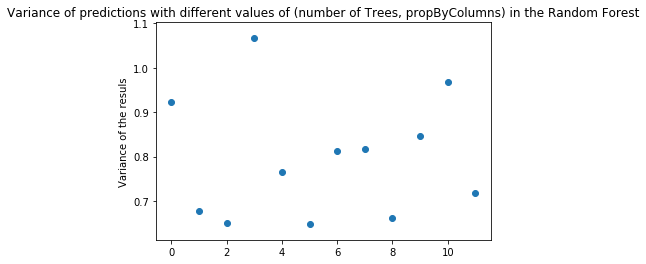

In [40]:
var_n = []
i = 0
while i < len(var) :
    var_n.append( np.mean(np.array(var[i : i+2])) )
    i=i+3

plt.scatter(range(12),var)
plt.ylabel('Variance of the resuls')
plt.title('Variance of predictions with different values of (number of Trees, propByColumns) in the Random Forest')
plt.show()

On a décidé d'appliquer les hyperparamètres obtenu suite à la double boucle ci dessus. Le couple (nombre d'arbres optimal, proportion d'attributs par Tree optimal).
Cela nous donne donc une Random Forest relativement sûre dans ses predictions et surtout robuste au surapprentissage !

Ces hyperparamètres nous les avons obtenu dans la $P-fold-validation$ précédente !

In [42]:
n_trees = 8
max_d = 4

X_train = data_copy3.sample(frac=0.7, random_state=None)
X_test = data_copy3.drop(X_train.index)
y_train, y_test = target[X_train.index], target[X_test.index]
forest = RandomForest(nb_trees=n_trees, prop_individuals_byTree=0.2, prop_dimensions_byTree=0.5, max_depth_by_tree=max_d)   
pred, matrix = forest.test_data_rf(X_train, y_train, X_test, y_test)

print("Forest done !")
print("Confusion matrix of the forest : \n", matrix)

1 tree(s) done.
2 tree(s) done.
3 tree(s) done.
4 tree(s) done.
5 tree(s) done.
6 tree(s) done.
7 tree(s) done.
8 tree(s) done.
----------------


Forest done !
Confusion matrix of the forest : 
 [[17  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  4  0 10  0  0]
 [ 0  0  0  0  0 14]]


## 5. Conclusion

Comme prévu, les outils de Machine Learning vu en classe sont puissants et robustes, ainsi ils nous donnent des résultats plus que satisfaisants. 
Nous avons ainsi découvert des corrélations entre les attributs, et fait en sorte que nos modèles ne sur-apprennent pas.

Le défaut de notre étude, pourrait être la taille de notre data-set très petit, mais dans l’optique de travailler sur le domaine de l’espace, nous avons choisi d’avoir des modèles précis et puissants plutôt que de nous disperser sur plusieurs études.

D’un point de vue plus personnel, nous avons ainsi pu travailler sur un sujet qui nous tenait à coeur, et pu découvrir des propriétés sur les étoiles que nous n’avions pas eu la chance d’étudier jusqu’ici.

Si nous avions un nouveau projet de Machine Learning a réalisé, nous avons décidé que nous aimerions bien approfondir les Réseaux de neurones, dans le cadre de l’analyse d’image (notamment la base de données de Yann Lecun).

Les spécificités de la base de données (petite taille, bonne séparabilité, peu d'outliers) font du SVM, outil plus théorique, un meilleur candidat à la classification.